# <center>CS-485 Data Science and Applications</center>
## <center>Assignment 2</center>
### <center>Alexandros Angelakis csdp1363, angelakis@csd.uoc.gr</center>

---
## **Homework: Part 1**


- ### There is a generalized family of distributions called Gaussian Mixture Models GMMs (simply a sum of Gaussians), with a $pdf$ given by:

\begin{equation}
p(x) = \sum_{i=1}^{K} w_i \mathbb{N}(x|\mu_i, \sigma_i)
\end{equation}

Where:
1. $K$: is the number of Gaussians
2. $\mu_i, \sigma_i$: are the parameters of each Gaussian
3. $w_i$: is the coefficient (weight) of each Gaussian (mode)
<br>

- ### In order for the GMM to be a distribution the coefficents $w_i$, must sum to one:

\begin{equation}
\sum_{i=1}^{K}w_i = 1
\end{equation}

![Subdirectory Image](https://github.com/gtsagkatakis/Data-Science-and-Applications/blob/main/Images/gmm.png?raw=1)


<br><br>

## You are given a GMM model consisting of 3 Gaussians: $\mathbb{N}_1(0, 1), \mathbb{N}_2(-2, 0.5), \mathbb{N}_3(3, 2),$

1. #### Compute the $pdf$ of the GMM analytically using the libraries desribed above and plot the actual $pdfs$.
2. #### Assuming we are given the GMM model, sample from our model using the method we described above in a two-step way.
    First flip a $K$ sided coin to decide from which mode (Gaussian) we are sampling from

    Then, use the exact same trick we had above to samples from the specific Gaussian

    Plot the actual GMMs and the histogram of your samples for different sample sizes (e.g. $100, 1000, 10000$)

    Show that the histogram converges to the actual distribution

    **Hint:** You can use the numpy.random.choice() function and pass in the list of $w_i$ coefficients as the list of probabilities of each mode (Gaussian)


In [1]:
#imports
# Import modules/libraries
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
data = load_breast_cancer(as_frame=True).data
print(data.shape)
data.head()


(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Getting statistics
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


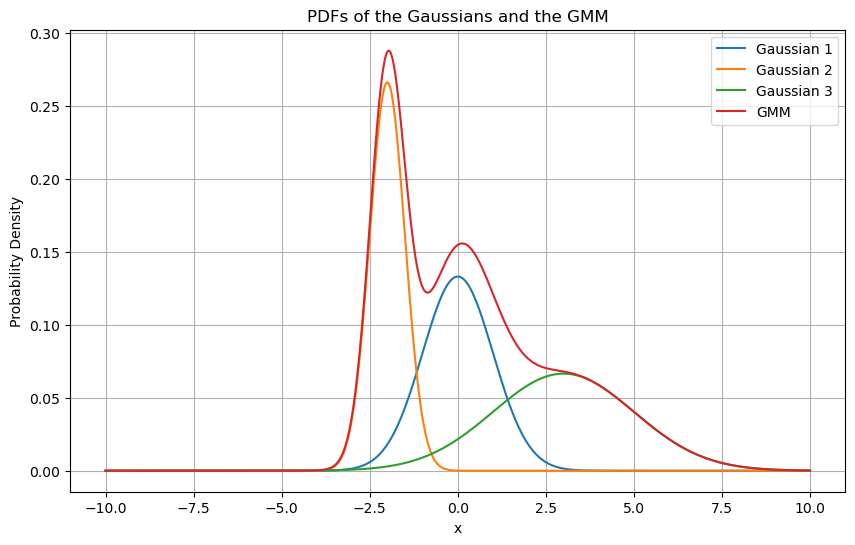

In [4]:
# Analytically generate the GMM model pdf

x = np.linspace(-10, 10, 1000)
mus = [0, -2, 3]
sigmas = [1, 0.5, 2]
weights = [1/3, 1/3, 1/3]

pdf1 = weights[0] * norm.pdf(x, mus[0], sigmas[0])
pdf2 = weights[1] * norm.pdf(x, mus[1], sigmas[1])
pdf3 = weights[2] * norm.pdf(x, mus[2], sigmas[2])
pdfs = np.array([pdf1, pdf2, pdf3])

gmm_pdf = np.sum(pdfs, axis=0)

plt.figure(figsize=(10, 6))
plt.plot(x, pdf1, label='Gaussian 1')
plt.plot(x, pdf2, label='Gaussian 2')
plt.plot(x, pdf3, label='Gaussian 3')
plt.plot(x, gmm_pdf, label='GMM')
plt.title('PDFs of the Gaussians and the GMM')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

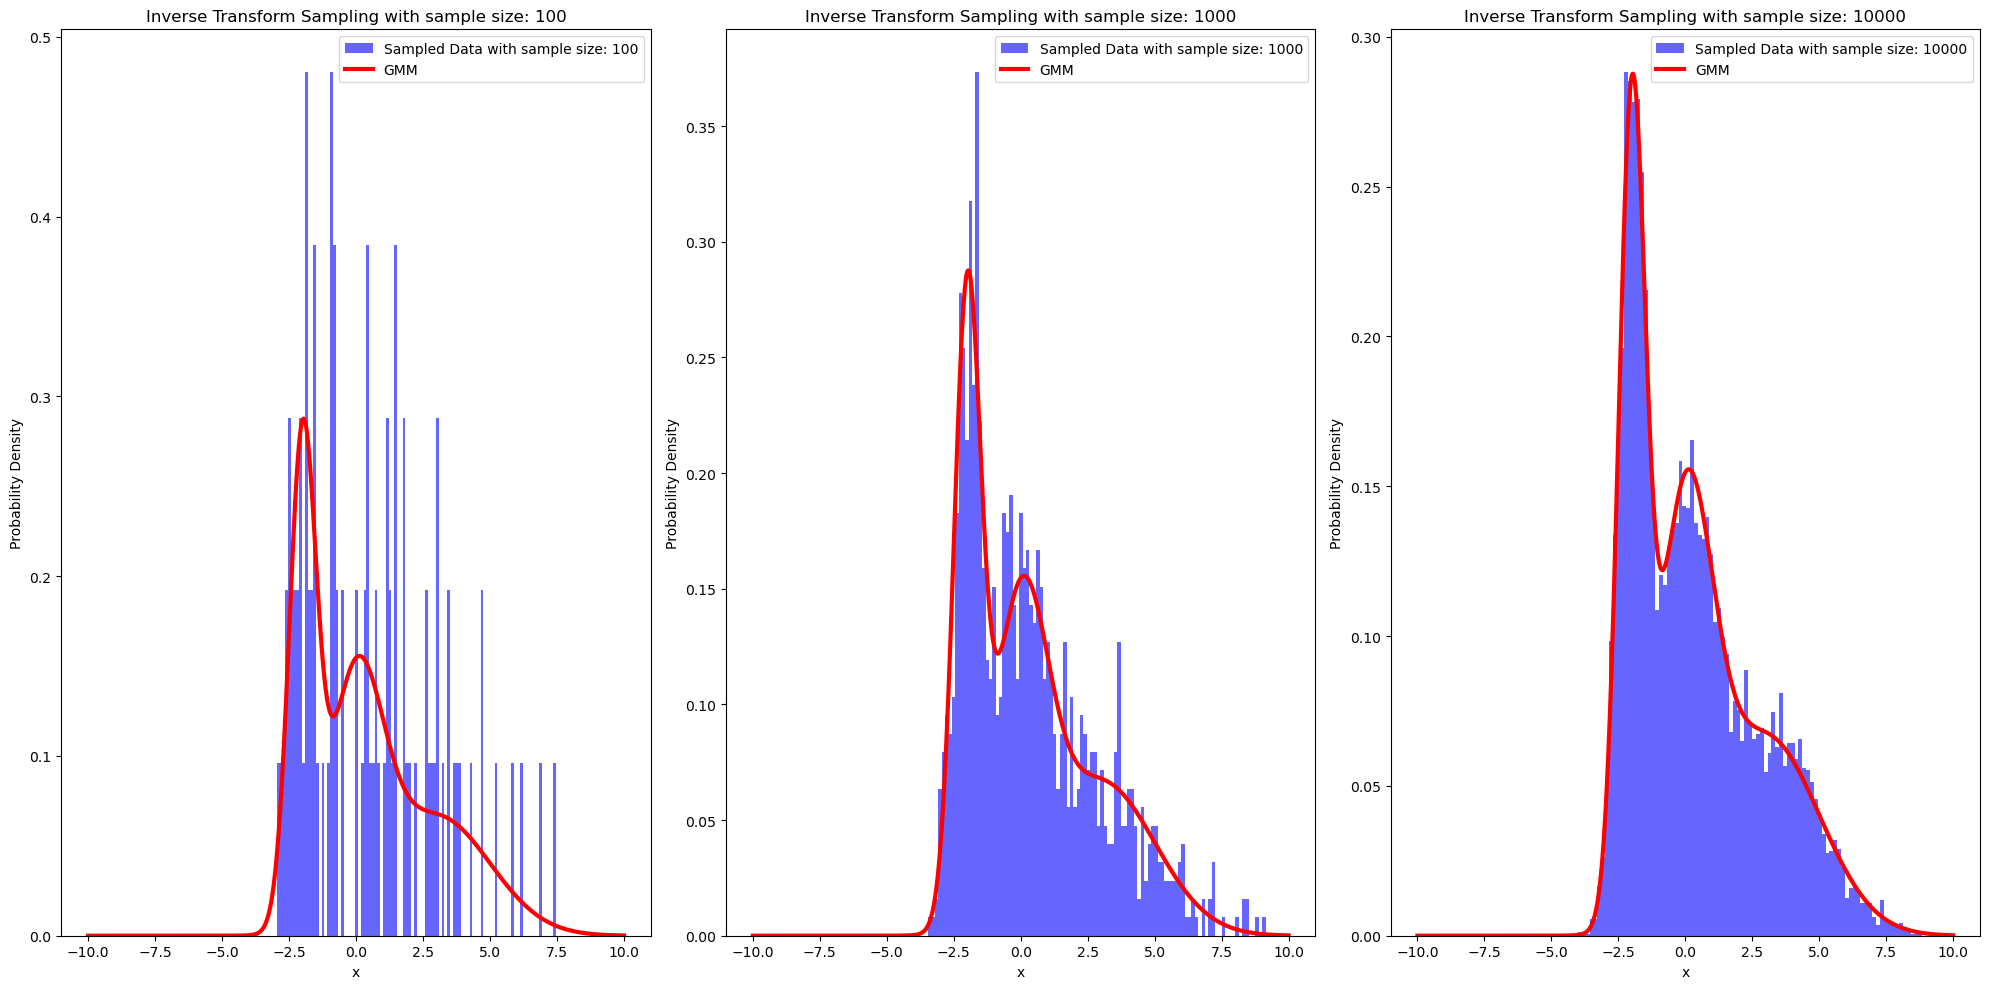

In [5]:
# Sample from the GMM and store the samples in np.arrays
sample_sizes = [100, 1000, 10000]

bins = 100

fig, axes = plt.subplots(1, 3, figsize=(20, 10))

for i, sample_size in enumerate(sample_sizes):
    normal_samples = np.zeros(sample_size)

    for j in range(sample_size):

        mode = np.random.choice(3, p=weights)

        # Step 1: Sample from a uniform distribution
        uniform_sample = np.random.uniform(0, 1)

        # Step 2: Transform the uniform samples using the inverse CDF of the normal distribution
        normal_samples[j] = norm.ppf(uniform_sample, loc=mus[mode], scale=sigmas[mode])
    
    axes[i].hist(normal_samples, bins, density=True, alpha=0.6, color='b', label=f'Sampled Data with sample size: {sample_size}')
    axes[i].plot(x, gmm_pdf, color='r', label='GMM', linewidth=3)
    axes[i].set_title(f'Inverse Transform Sampling with sample size: {sample_size}')
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('Probability Density')
    axes[i].legend(loc='best')

plt.tight_layout()
plt.show()

---
## **Homework: Part 2**

- #### Use the sklearn Breast Cancer Dataset we used and pick a different feature to analyze that you think is likely to be generated from an underlying Gaussian.

- #### That means you will be assuming that the distribution of the feature you choose is coming from a Gaussian parametrized by the vector:

\begin{equation}
\vec{\theta} = [\mu, \sigma]
\end{equation}

- #### Plot the Histogram of you feature, and the 0.05, 0.25, 0.5, 0.75, 0.95 p-values

- #### Calculate the mean and the std esimates of your feature vector

- #### Use the Maximum Likelihood Estimation we saw before to estimate the parameter vector and thus the Gaussian that best describes the feature vector you selected.

- #### One can easily estimate the Gaussian without the Maximum Likelihood Estimation by simply using the mean and std estimates we saw earlier. Use this simple derivation to compare against the MLE solution. These two should be the same

#### **Hints:** In this case you will have a function of both $\mu$ and $\sigma$. Get the partial derivatives of each one and set them to zero.


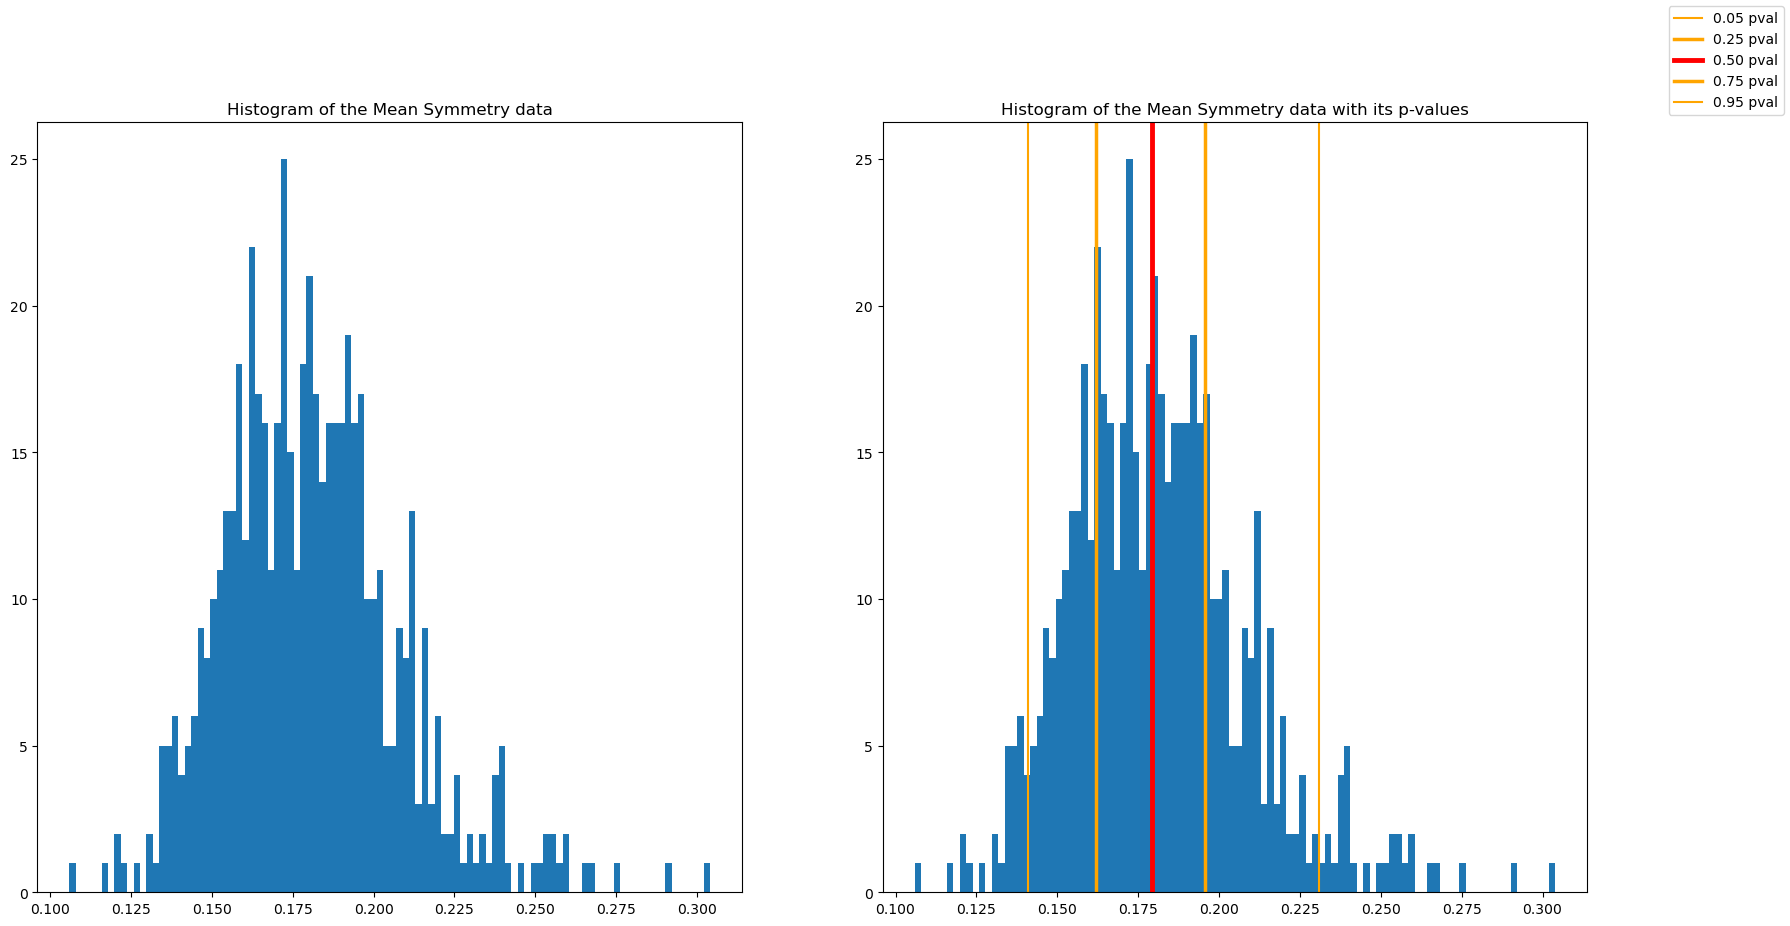

In [6]:
# Select a feature vector, plot its histogram and p-values with vertical axes
mean_symmetry = data["mean symmetry"].to_numpy()

# Computing the p-values
sorted_mean_symmetry = np.sort(mean_symmetry)
n_samples = len(sorted_mean_symmetry)
p05 = sorted_mean_symmetry[int(0.05 * n_samples)]
p25 = sorted_mean_symmetry[int(0.25 * n_samples)]
p50 = sorted_mean_symmetry[int(0.50 * n_samples)]
p75 = sorted_mean_symmetry[int(0.75 * n_samples)]
p95 = sorted_mean_symmetry[int(0.95 * n_samples)]

# Plotting the histogram and the p-values as vertical lines
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].hist(mean_symmetry, bins=100)
axes[0].set_title('Histogram of the Mean Symmetry data')

axes[1].hist(mean_symmetry, bins=100)
axes[1].axvline(p05, color="orange", linewidth=1.5, label="0.05 pval")
axes[1].axvline(p25, color="orange", linewidth=2.5, label="0.25 pval")
axes[1].axvline(p50, color="r", linewidth=3.5, label="0.50 pval")
axes[1].axvline(p75, color="orange", linewidth=2.5, label="0.75 pval")
axes[1].axvline(p95, color="orange", linewidth=1.5, label="0.95 pval")
axes[1].set_title('Histogram of the Mean Symmetry data with its p-values')
fig.legend()

The real mu is: [0.18116186] and the real sigma is: [0.02741428]


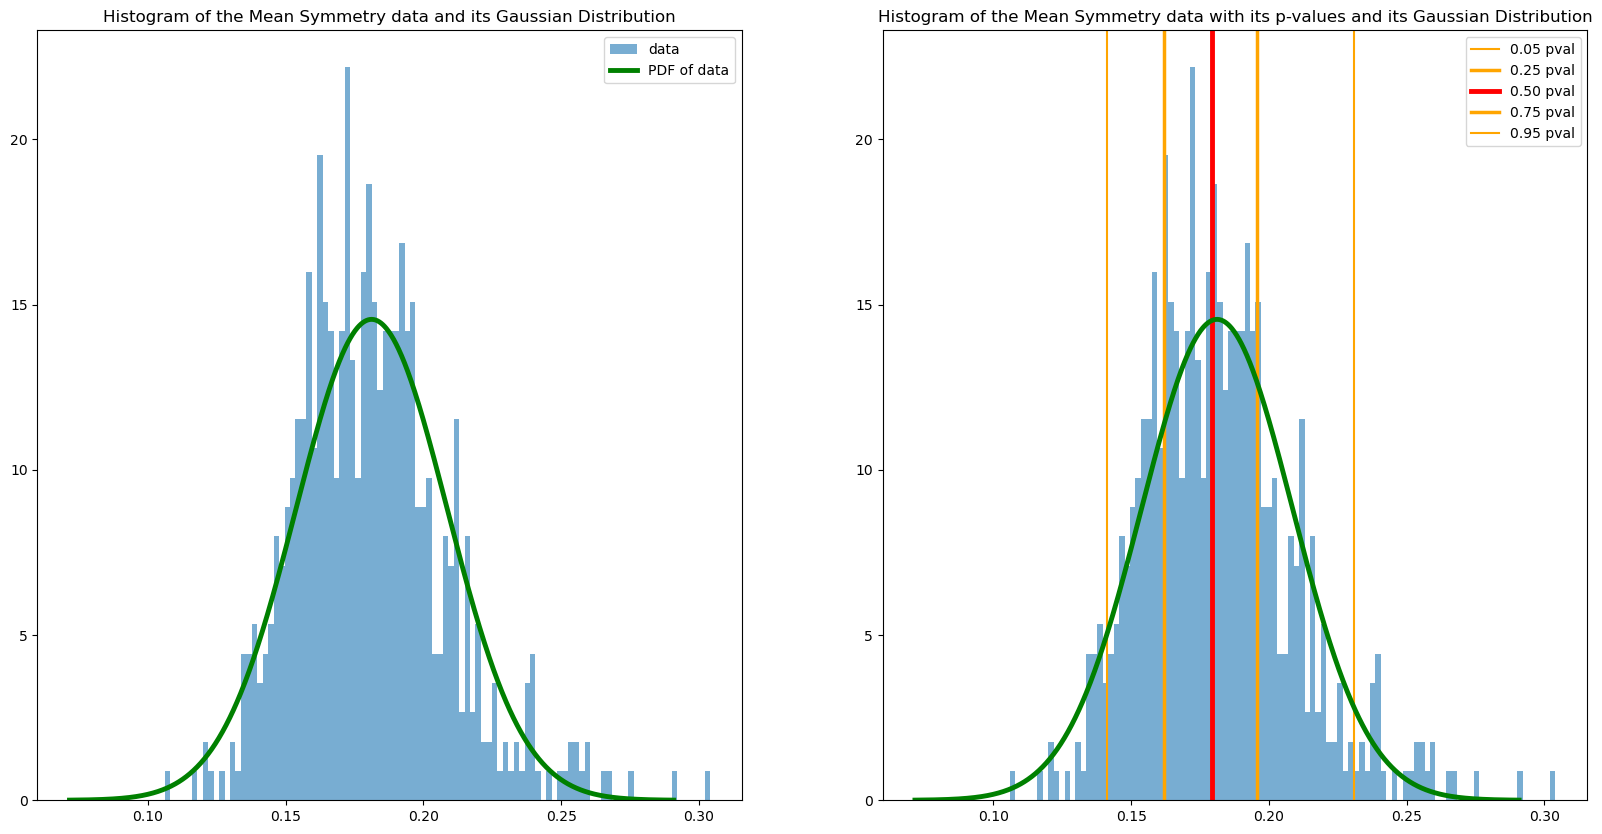

In [7]:
# Derive the Gaussian estimate by simply using the mean and std estimates and plot them against the histogram
real_mu = data[["mean symmetry"]].mean().to_numpy()
real_sigma = data[["mean symmetry"]].std().to_numpy()
print(f'The real mu is: {real_mu} and the real sigma is: {real_sigma}')

x = np.linspace(real_mu - 4*real_sigma, real_mu + 4*real_sigma, 1000)

# Plotting the histogram and the p-values as vertical lines
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].hist(mean_symmetry, bins=100, density=True, alpha=0.6, label='data')
axes[0].set_title('Histogram of the Mean Symmetry data and its Gaussian Distribution')
axes[0].plot(x, norm.pdf(x, real_mu, real_sigma), color='g', label='PDF of data', linewidth=3.5)
axes[0].legend()

axes[1].hist(mean_symmetry, bins=100, density=True, alpha=0.6)
axes[1].axvline(p05, color="orange", linewidth=1.5, label="0.05 pval")
axes[1].axvline(p25, color="orange", linewidth=2.5, label="0.25 pval")
axes[1].axvline(p50, color="r", linewidth=3.5, label="0.50 pval")
axes[1].axvline(p75, color="orange", linewidth=2.5, label="0.75 pval")
axes[1].axvline(p95, color="orange", linewidth=1.5, label="0.95 pval")
axes[1].set_title('Histogram of the Mean Symmetry data with its p-values and its Gaussian Distribution')
axes[1].plot(x, norm.pdf(x, real_mu, real_sigma), color='g', linewidth=3.5)
axes[1].legend()

The Gaussian Distribution is given by the following expression:

\begin{equation}
f(x|\mu,\sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
\end{equation}

The function $f(x|\mu,\sigma^2)$ is fully parametrized by the scalars $\mu$ and $\sigma^2$. By plotting the histogram of the Mean Symmatry data, we can see that it reminds us of the normal distribution. That means the above function is a good candidate model and thus we want to find the best instance of this family of functions parametrized by $\mu$ and $\sigma^2$ that best captures the data.

- We define the likelihood of a sample given the model as $p(x|\mu, \sigma^2) = f_{X, \theta}(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}$, where $\vec{\theta}$ is a vector that contains the scalars $\mu$ and $\sigma^2$

- Assuming we have a vector of i.i.d data $\vec{x} = [x_1, x_2, \ldots, x_N]$, we define the likelihood of observing these samples given our model described by $\vec{\theta} = <\mu, \sigma^2>$, as $\mathbb{L}(\mathbf{x};\mu, \sigma^2) = \prod_{i=1}^{N} \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x_i - \mu)^2}{2\sigma^2}}$

- We now want to find the values $\mu$ and $\sigma^2$ that generates an exponential function that best describes the data distribution. We do that by maximizing the likelihood above.

- Maximizing the likelihood is equivalent to maximizing the Log Likelihood because logarithm is a monotonous function.

- We thus formulate our problem as follows:

\begin{align}
argmax_{\mu, \sigma^2} (\prod_{i=1}^{N} \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x_i - \mu)^2}{2\sigma^2}}) &= argmax_{\mu, \sigma^2} (log(\prod_{i=1}^{N} \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x_i - \mu)^2}{2\sigma^2}})) \\
&= argmax_{\mu, \sigma^2} (\sum_{i=1}^{N} log(\frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x_i - \mu)^2}{2\sigma^2}})) \\
&= argmax_{\mu, \sigma^2} (\sum_{i=1}^{N} log(\frac{1}{\sqrt{2\pi\sigma^2}}) + log(e^{-\frac{(x_i - \mu)^2}{2\sigma^2}}))\\
&= argmax_{\mu, \sigma^2} (N*log(\frac{1}{\sqrt{2\pi\sigma^2}}) + \sum_{i=1}^{N} log(e^{-\frac{(x_i - \mu)^2}{2\sigma^2}})) \\
&= argmax_{\mu, \sigma^2} (-log(\sqrt{2\pi\sigma^2}) + \sum_{i=1}^{N} -\frac{(x_i - \mu)^2}{2\sigma^2}) \\
&= argmax_{\mu, \sigma^2} (-\frac{1}{2}log(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{N} (x_i - \mu)^2) \\
\end{align}

- First, we need to find the partial derivatives of $\mathbb{L}(\mu, \sigma^2)$ with respect to $\mu$ and $\sigma^2$

\begin{equation}
\mathbb{L}(\mu, \sigma^2) = -\frac{1}{2}log(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{N} (x_i - \mu)^2
\end{equation}

\begin{align}
\frac{\partial{\mathbb{L}(\mu, \sigma^2)}}{\partial{\mu}} = \frac{1}{2\sigma^2} \sum_{i=1}^{N} 2(x_i - \mu) = \frac{1}{\sigma^2} \sum_{i=1}^{N} (x_i - \mu)
\end{align}

\begin{align}
\frac{\partial{\mathbb{L}(\mu, \sigma^2)}}{\partial{\sigma^2}} = -\frac{N}{2}\frac{1}{2\pi\sigma^2}(2\pi\sigma^2)' - \frac{1}{2} (-\frac{1}{\sigma^4}) \sum_{i=1}^{N} (x_i - \mu)^2 &= -\frac{N}{2\sigma^2} + \frac{1}{2\sigma^4} \sum_{i=1}^{N} (x_i - \mu)^2
\end{align}

- Now we need set them equal to zero, in order to find the global maximum.

\begin{align}
\frac{\partial{\mathbb{L}(\mu, \sigma^2)}}{\partial{\mu}} = 0 \Leftrightarrow \frac{1}{\sigma^2} \sum_{i=1}^{N} (x_i - \mu) = 0 \Leftrightarrow \sum_{i=1}^{N} (x_i - \mu) = 0 \Leftrightarrow \sum_{i=1}^{N}x_i - N\mu = 0 \Leftrightarrow \boxed{\hat{\mu} = \frac{\sum_{i=1}^{N}x_i}{N}}
\end{align}

\begin{align}
\frac{\partial{\mathbb{L}(\mu, \sigma^2)}}{\partial{\sigma^2}} = 0 \Leftrightarrow -\frac{N}{2\sigma^2} + \frac{1}{2\sigma^4} \sum_{i=1}^{N} (x_i - \mu)^2 = 0 \Leftrightarrow -N\sigma^2 + \sum_{i=1}^{N} (x_i - \mu)^2 = 0 \Leftrightarrow \boxed{\hat{\sigma^2} = \frac{\sum_{i=1}^{N} (x_i - \hat{\mu})^2}{N}}
\end{align}


Estimate mu: 0.18116186291739894 and estimated sigma" 0.027390180864268532


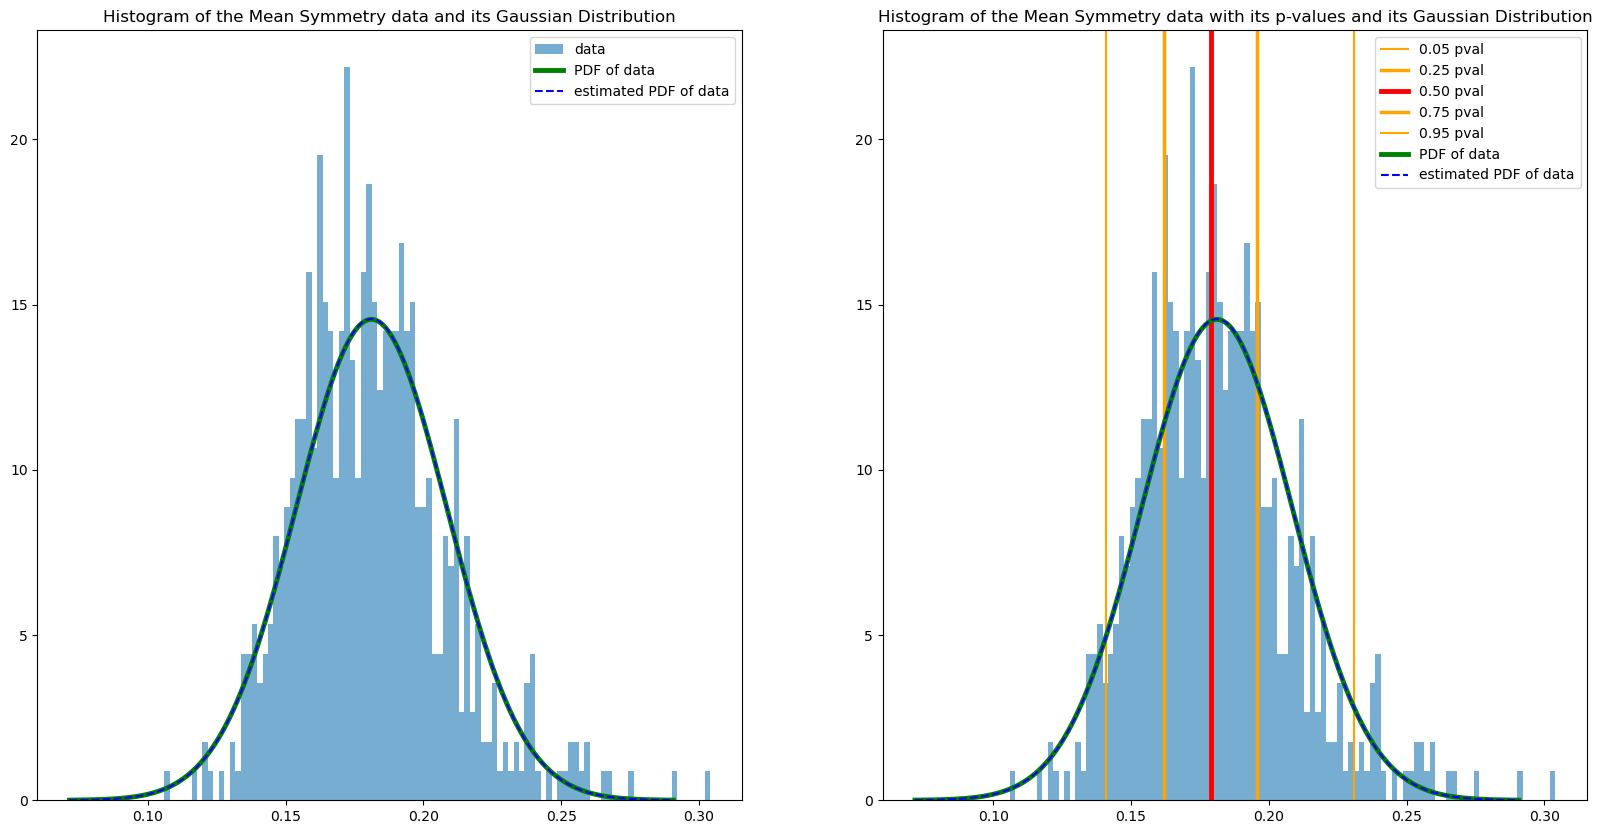

In [8]:
# Use the Maximum Likelihood Estimation (MLE) method to estimate the mean and std. Plot the new estimated Gaussian against the previous and the histogram (They should be the same)
N = len(mean_symmetry)
mu_hat = np.sum(mean_symmetry) / N
sigma_hat = np.sqrt(np.sum((mean_symmetry - mu_hat) ** 2) / N)

print(f'Estimate mu: {mu_hat} and estimated sigma" {sigma_hat}')

x = np.linspace(mu_hat - 4*sigma_hat, mu_hat + 4*sigma_hat, 1000)

# Plotting the histogram and the p-values as vertical lines
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].hist(mean_symmetry, bins=100, density=True, alpha=0.6, label='data')
axes[0].set_title('Histogram of the Mean Symmetry data and its Gaussian Distribution')
axes[0].plot(x, norm.pdf(x, real_mu, real_sigma), '-', color='g', label='PDF of data', linewidth=3.5)
axes[0].plot(x, norm.pdf(x, mu_hat, sigma_hat), '--', color='b', label='estimated PDF of data', linewidth=1.5)
axes[0].legend()

axes[1].hist(mean_symmetry, bins=100, density=True, alpha=0.6)
axes[1].axvline(p05, color="orange", linewidth=1.5, label="0.05 pval")
axes[1].axvline(p25, color="orange", linewidth=2.5, label="0.25 pval")
axes[1].axvline(p50, color="r", linewidth=3.5, label="0.50 pval")
axes[1].axvline(p75, color="orange", linewidth=2.5, label="0.75 pval")
axes[1].axvline(p95, color="orange", linewidth=1.5, label="0.95 pval")
axes[1].set_title('Histogram of the Mean Symmetry data with its p-values and its Gaussian Distribution')
axes[1].plot(x, norm.pdf(x, real_mu, real_sigma), '-', color='g', label='PDF of data', linewidth=3.5)
axes[1].plot(x, norm.pdf(x, mu_hat, sigma_hat), '--', color='b', label='estimated PDF of data', linewidth=1.5)
axes[1].legend()

As we can see, the estimated mu and sigma are really really close to the real ones, so MLE did a pretty good job estimating our parameters.

In [9]:
print(f'Estimated mu: {np.round(mu_hat, 6)} and real mu: {np.round(real_mu[0], 6)}')
print(f'Estimated sigma: {np.round(sigma_hat, 6)} and real sigma is: {np.round(real_sigma[0], 6)}')

Estimated mu: 0.181162 and real mu: 0.181162
Estimated sigma: 0.02739 and real sigma is: 0.027414
